<a href="https://colab.research.google.com/github/HaeunJeon/Newwords/blob/main/%EB%A6%AC%EB%B7%B0_%ED%86%B5%EA%B3%84%2C_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요 모듈 임포트
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
# 데이터 경로 확인 및 파일 크기 확인
DATA_IN_PATH = '/Users/hyeon/workspace/'
print('파일 크기 : ')
for file in os.listdir(DATA_IN_PATH):
    if 'txt' in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
ratings_test.txt              4.89MB
ratings.txt                   19.52MB
ratings_train.txt             14.63MB


In [ ]:
# 학습데이터 판다스로 올리기, 학습데이터 확인
train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header = 0, delimiter = '\t', quoting = 3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
# 데이터 개수 확인
print('전체 학습 데이터의 개수 : {}'.format(len(train_data)))

전체 학습 데이터의 개수 : 150000


In [ ]:
# 데이터 길이 확인
train_length = train_data['document'].astype(str).apply(len)
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

<ipython-input-6-ff30bee78466>:14: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy = 'clip')


Text(0, 0.5, 'Number of review')

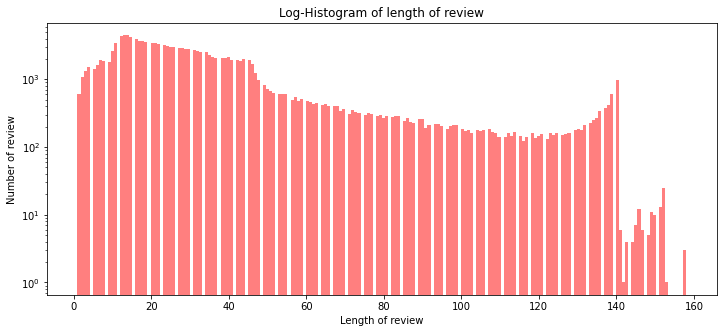

In [ ]:
# 데이터 길이 그래프로 확인하기

# 그래프에 대한 이미지 크기 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize = (12, 5))

# 히스토그램 선언
# bins: 히스토그램 값에 대한 버킷 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins = 200, alpha = 0.5, color = 'r', label = 'word')
plt.yscale('log', nonposy = 'clip')

# 그래프 제목
plt.title('Log-Histogram of length of review')

# 그래프 x축 라벨
plt.xlabel('Length of review')

# 그래프 y축 라벨
plt.ylabel('Number of review')

In [ ]:
# 테이터 길이 통계치로 확인
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))

# 4분위의 경우 0-100 스케일로 되어있음
print('리뷰 길이 제1사분위:{}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제4사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최댓값: 158
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 35.24
리뷰 길이 표준편차: 29.58
리뷰 길이 중간값: 27.0
리뷰 길이 제1사분위:16.0
리뷰 길이 제4사분위: 42.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fcfe9f58190>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcfe9f58850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcfe9d3adc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcfe9f58f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcfe9f60610>],
 'means': [<matplotlib.lines.Line2D at 0x7fcfe9f602b0>]}

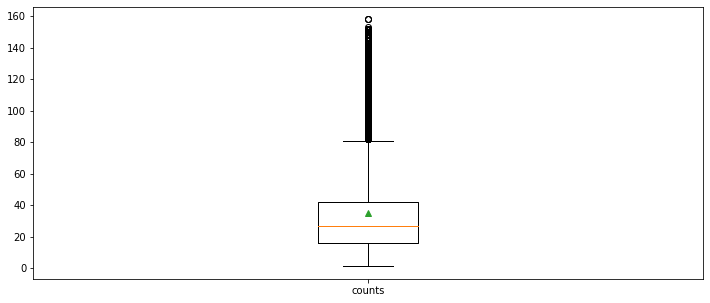

In [ ]:
# 데이터 길이 박스플롯
plt.figure(figsize = (12, 5))

#박스플롯생성
#첫번째 파라미터: 여러 분포에 대한 데이터 리스트를 입력
#labels: 입력 데이터에 대한 라벨
#showmeans: 평균값을 마크함

plt.boxplot(train_length,
           labels = ['counts'],
           showmeans = True)

In [ ]:
# 워드클라우드를 활용한 어휘 빈도 분석
train_review = [review for review in train_data['document'] if type(review) is str]

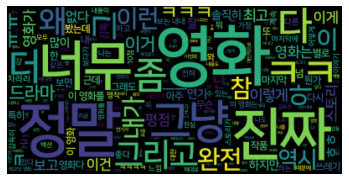

In [ ]:
# 워드클라우드 생성
# 워드클라우드는 영어만 지원해서 글자 깨질 수도 -> 한글폰트하나 다운받아서 path 폴더에 추가
wordcloud = WordCloud(font_path = DATA_IN_PATH + 'NanumSquareOTF_acB.otf').generate(' '.join(train_review))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

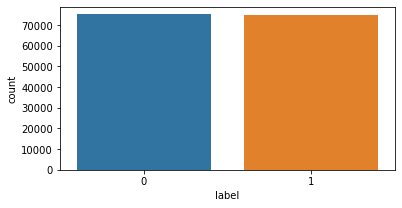

In [ ]:
# 긍부정을 나타내는 라벨값의 비율 확인
fig, axe = plt.subplots(ncols = 1)
fig.set_size_inches(6,3)
sns.countplot(train_data['label'])

In [ ]:
# 실제로 긍정 부정 리뷰 개수 확인
print('긍정 리뷰 개수: {}'.format(train_data['label'].value_counts()[1]))
print('부정 리뷰 개수: {}'.format(train_data['label'].value_counts()[0]))

긍정 리뷰 개수: 74827
부정 리뷰 개수: 75173


<ipython-input-13-f4154625d574>:6: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy = 'clip')


Text(0, 0.5, 'Number of reviews')

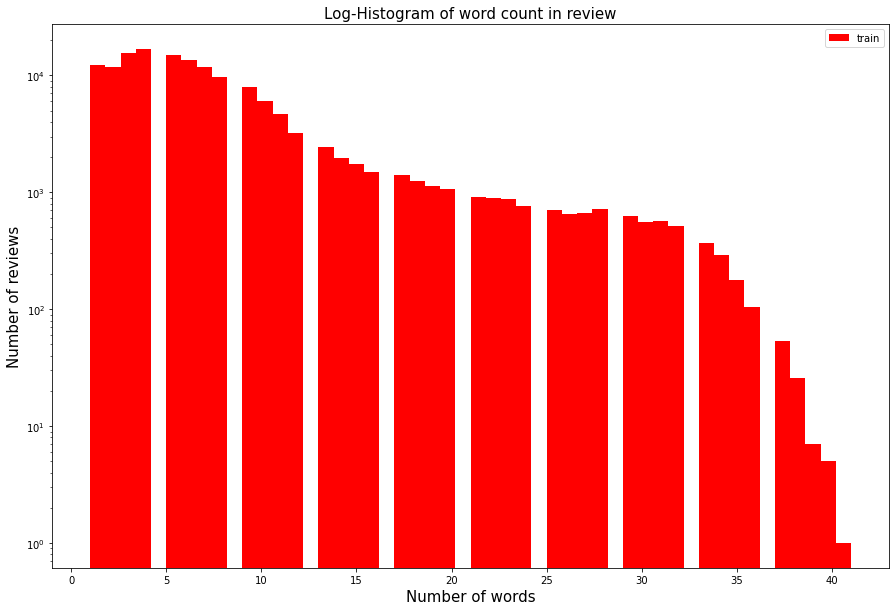

In [ ]:
# 각 리뷰의 단어수 확인, 데이터를 띄어쓰기 기준으로 나누고 하나의 변수로 할댕해 히스토그램 작성
train_word_counts = train_data['document'].astype(str).apply(lambda x: len(x.split(' ')))
plt.figure(figsize = (15, 10))
plt.hist(train_word_counts, bins = 50, facecolor = 'r', label = 'train')
plt.title('Log-Histogram of word count in review', fontsize = 15)
plt.yscale('log', nonposy = 'clip')
plt.legend()
plt.xlabel('Number of words', fontsize = 15)
plt.ylabel('Number of reviews', fontsize = 15)

In [ ]:
# 실제 단어 개수 확인
print('리뷰 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))

# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최대 값: 41
리뷰 단어 개수 최소 값: 1
리뷰 단어 개수 평균 값: 7.58
리뷰 단어 개수 표준편차: 6.51
리뷰 단어 개수 중간 값: 6.0
리뷰 단어 개수 제 1 사분위: 3.0
리뷰 단어 개수 제 3 사분위: 9.0


In [ ]:
# 특수문자 유무 확인
# 물음표가 구두점으로 쓰이는가
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x: '?' in x))
# 마침표가 쓰이는가
fullstop = np.mean(train_data['document'].astype(str).apply(lambda x: '.' in x))

print('물음표가 있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))

물음표가 있는 질문: 8.25%
마침표가 있는 질문: 51.76%


In [ ]:
# 모듈 임포트
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

DATA_IN_PATH = '/Users/hyeon/workspace/'

train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header = 0, delimiter = '\t', quoting = 3)

In [ ]:
# 데이터 일부 확인
train_data['document'][:5]

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object

In [ ]:
# 특수문자 제거 test
review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', '', train_data['document'][0])
print(review_text)

아 더빙 진짜 짜증나네요 목소리


In [ ]:
# 형태소 분석기 사용 test
okt = Okt()
review_text = okt.morphs(review_text, stem = True)
print(review_text)

['아', '더빙', '진짜', '짜증나다', '목소리']


In [ ]:
# 불용어 제거 test, 데이터에 따라 안해도 되는 경우 있음
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한'])
clean_review = [token for token in review_text if not token in stop_words]
clean_review

['더빙', '진짜', '짜증나다', '목소리']

In [ ]:
# 하나의 함수로 만든다
def preprocessing(reviews, okt, remove_stopwords = False, stop_words = []):
    # 함수의 인자 설명
    # review: 전처리할 텍스트
    # okt: okt객체를 반복적으로 생성하지 않고 미리 생성한 후 인자로 받는다.
    # remove_stopwords: 불용어를 제가할지 여부 선택, 기본값은 False
    # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값은 빈리스트
    
    #1. 한글 및 공백을 제외한 문자를 모두 제거
    review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', '', review)
    
    #2. Okt 객체를 활용해 형태소 단위로 나눔
    word_review = okt.morphs(review_text, stem = True)
    
    if remove_stopwords:
        # 불용어 제거(선택)
        word_review = [token for token in word_review if not token in stop_words]
    
    return word_review

In [ ]:
# 실제 학습데이터 전처리 진행
stop_words = ['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한']
okt = Okt()
clean_train_review = []

for review in train_data['document']:
    # 비어있는 데이터에서 멈추지 않도록 문자열인 경우에만 진행
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words = stop_words))
    # string이 아니면 비어있는 값 추가
    else:
        clean_train_review.append([])
        
clean_train_review[:4] # 데이터 확인

[['더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정']]

In [ ]:
clean_train_df = pd.DataFrame({'review': clean_train_review, 'sentiment': train_data['label']})

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)

In [ ]:
print(text_sequences[0])

[463, 20, 265, 664]


In [ ]:
# 단어 사전 형태, 인덱스 벡터로 형성
word_vocab = tokenizer.word_index

# 문장 최대 길이, 이전 데이터 분석 시에 단어 평균 개수가 8개 정도였기 때문
MAX_SEQUENCE_LENGTH = 8

# 패딩 및 학습데이터 벡터화
train_inputs = pad_sequences(train_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding = 'post')
train_labels = np.array(train_data['label']) #학습데이터의 라벨

In [ ]:
# 데이터들을 모델링에 쓸 수 있도록 저장해둔다
DATA_IN_PATH = '/Users/hyeon/workspace/'
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1 # vocab size 추가

import os
# 저장하는 디렉토리가 존재하지 않으면 생성
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

# 전처리 된 학습 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)

# 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

In [ ]:
train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

print('Shape of train data: ', train_inputs.shape)


Shape of train data:  (15918, 8)


In [ ]:
train_labels = np.array(train_data['label'])
print('Shape of label tensor:', train_labels.shape)

Shape of label tensor: (150000,)


In [ ]:
test_data = pd.read_csv('/Users/hyeon/project/crawling_data/dc_inside/df_DC_soccer.csv')

stop_words = ['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한']
okt = Okt()
clean_test_review = []

for review in test_data['title']:
    # 비어있는 데이터에서 멈추지 않도록 문자열인 경우에만 진행
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words = stop_words))
    # string이 아니면 비어있는 값 추가
    else:
        clean_test_review.append([])

In [ ]:
clean_test_review[:4] # 데이터 확인

[['손흥민', '이랑', '비슷하다', '플레이', '스타일', '가지다', '선수', '누구', '있다'],
 ['프랑스', '대통령', '축구선수', '오다', '마중', '까지', '가다'],
 ['토마', '개다', '완장', 'ㅂㅅㅅㄲ'],
 ['구토', '넬', '라는', '연예인', '급', '인', '건', '같다']]

In [ ]:
clean_test_df = pd.DataFrame({'review': clean_test_review, 'id': test_data['date']})
test_id = np.array(test_data['date'])

In [ ]:
clean_test_df

,review,id
0,"[손흥민, 이랑, 비슷하다, 플레이, 스타일, 가지다, 선수, 누구, 있다]",2021.8.9 14:13
1,"[프랑스, 대통령, 축구선수, 오다, 마중, 까지, 가다]",2021.8.9 21:47
2,"[토마, 개다, 완장, ㅂㅅㅅㄲ]",2021.8.9 21:40
3,"[구토, 넬, 라는, 연예인, 급, 인, 건, 같다]",2021.8.9 21:32
4,"[포, 치다, 손흥민, 쓰다, 씨발, 우주, 방위, 대, 쓰다, ㅋㅋㅋㅋㅋㅋㅋ]",2021.8.9 21:24
...,...,...
15913,"[오늘, 곽, 민선, 방송, 권창훈, 웃, 차다, ㅋㅋㅋㅋ]",2021.8.8 0:54
15914,"[가다, 굴굴스, 냐]",2021.8.8 0:54
15915,"[오늘, 보르도, 첫, 경, 기다, 황의조, 프랑스, 로, 복귀, 하다]",2021.8.8 0:54
15916,"[황의조, 황희, 찬, 을, 비교, 하다, ㅋㅋㅋㅋㅋㅋㅋㅋ]",2021.8.8 0:53


In [ ]:
text_sequences = tokenizer.texts_to_sequences(clean_test_review)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [ ]:
test_inputs

array([[  285,   598,  4232, ...,  2659,   549,    10],
       [  860,  2073, 15305, ...,    65,    76,     0],
       [22937,  1016, 24352, ...,     0,     0,     0],
       ...,
       [  450,   777,  1540, ...,    22,  5360,     3],
       [ 2347,     5,   608, ...,     0,     0,     0],
       [   78,  6153,  6576, ...,   821,     0,     0]], dtype=int32)

In [ ]:
TEST_INPUT_DATA = 'test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index = False)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import os
import json

from tqdm import tqdm

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [ ]:
DATA_IN_PATH = '/Users/hyeon/workspace/'
DATA_OUT_PATH = '/Users/hyeon/workspace/'
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

In [ ]:
train_input = np.load(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'rb'))
train_label = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'rb'))
prepro_configs = prepro_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))


In [ ]:
model_name = 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 10
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs = {'model_name': model_name,
        'vocab_size': prepro_configs['vocab_size'],
        'embedding_size': 128,
        'num_filters': 100,
        'dropout_rate': 0.5,
        'hidden_dimension': 250,
        'output_dimension':1}

In [ ]:
class CNNClassifier(tf.keras.Model):
    
    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                     output_dim=kargs['embedding_size'])
        self.conv_list = [layers.Conv1D(filters=kargs['num_filters'],
                                   kernel_size=kernel_size,
                                   padding='valid',
                                   activation=tf.keras.activations.relu,
                                   kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
                     for kernel_size in [3,4,5]]
        self.pooling = layers.GlobalMaxPooling1D()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                           activation=tf.keras.activations.relu,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                           activation=tf.keras.activations.sigmoid,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    
    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis=-1)
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x

In [ ]:
model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

In [ ]:
# overfitting을 막기 위한 ealrystop 추가
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=2)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)\

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

/Users/hyeon/workspace/cnn_classifier_kr -- Folder already exists 



In [ ]:
history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

Epoch 1/10
264/264 [==============================] - 39s 143ms/step - loss: 0.4573 - accuracy: 0.7767 - val_loss: 0.3943 - val_accuracy: 0.8207

Epoch 00001: val_accuracy improved from -inf to 0.82073, saving model to /Users/hyeon/workspace/cnn_classifier_kr/weights.h5
Epoch 2/10
264/264 [==============================] - 39s 147ms/step - loss: 0.3510 - accuracy: 0.8462 - val_loss: 0.3826 - val_accuracy: 0.8293

Epoch 00002: val_accuracy improved from 0.82073 to 0.82927, saving model to /Users/hyeon/workspace/cnn_classifier_kr/weights.h5
Epoch 3/10
264/264 [==============================] - 41s 157ms/step - loss: 0.3003 - accuracy: 0.8736 - val_loss: 0.3951 - val_accuracy: 0.8234

Epoch 00003: val_accuracy did not improve from 0.82927
Epoch 4/10
264/264 [==============================] - 39s 148ms/step - loss: 0.2552 - accuracy: 0.8947 - val_loss: 0.4247 - val_accuracy: 0.8190

Epoch 00004: val_accuracy did not improve from 0.82927


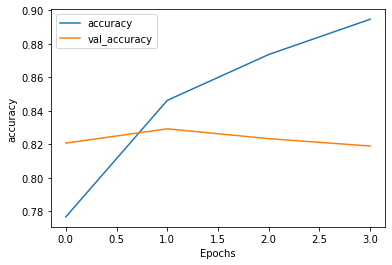

In [ ]:
plot_graphs(history, 'accuracy')


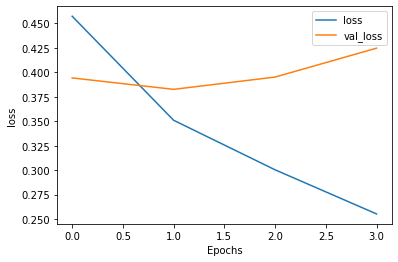

In [ ]:
plot_graphs(history, 'loss')


In [ ]:
DATA_OUT_PATH = '/Users/hyeon/workspace/'
TEST_INPUT_DATA = 'test_input.npy'
TEST_ID_DATA = 'test_id.npy'

test_input = np.load(open(DATA_IN_PATH + TEST_INPUT_DATA, 'rb'))
test_input = pad_sequences(test_input, maxlen=test_input.shape[1])

In [ ]:
TEST_INPUT_DATA

'test_input.npy'

In [ ]:
SAVE_FILE_NM = 'weights.h5'

model.load_weights(os.path.join(DATA_OUT_PATH, model_name, SAVE_FILE_NM))

In [ ]:
predictions = model.predict(test_input, batch_size=BATCH_SIZE)
predictions = predictions.squeeze(-1)

In [ ]:
test_id = np.load(open(DATA_IN_PATH + TEST_ID_DATA, 'rb'), allow_pickle=True)

if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)

output = pd.DataFrame(data={"id": list(test_id), 'title': clean_test_df['review'],"sentiment": list(predictions)} )
output.to_csv(DATA_OUT_PATH + 'DC_soccer_result_cnn.csv', index = False, encoding = 'utf-8-sig')